In [227]:
from standardInclude import *

In [228]:
enable_atlas_python()

In [229]:
#path = "/home/jlab/g-2/caloTrackMatching/data/run2c/"; dataset='Run 2C'
path = "/home/jlab/g-2/caloTrackMatching/data/endgame/"; dataset='EndGame'
files = os.listdir(path)
print(files)
names = [x.split("_")[0] for x in files]
print(names)

fs = {}
for file in files:
    name = file.split("_")[0]
    fs[name] = r.TFile(path+file)
    fs[name].ls()

['clusters_eg.root', 'tracks_eg.root', 'matchedTracks_eg.root']
['clusters', 'tracks', 'matchedTracks']
TFile**		/home/jlab/g-2/caloTrackMatching/data/endgame/clusters_eg.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/endgame/clusters_eg.root	
  KEY: TH3F	clusters13;1	clusters
  KEY: TH3F	randclusters13;1	time randomized clusters
  KEY: TH3F	clusters19;1	clusters
  KEY: TH3F	randclusters19;1	time randomized clusters
TFile**		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
  KEY: TH3I	trackerBeamPos;1	Tracker Beam Position vs. Time
  KEY: TH3I	trackerCaloPos;1	Tracker Calo Face Position vs. Time
  KEY: TH3I	trackerBeamPosRand;1	Tracker Beam Position vs. Rand Time
  KEY: TH3I	trackerCaloPosRand;1	Tracker Calo Face Position vs. Rand Time
  KEY: TH3I	trackerCaloPos_noRadialField;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time
  KEY: TH3I	trackerCaloPos_noRadialFieldRand;1	Tracker 

In [230]:
allFitResults = {}

In [231]:
def fitfunc(choice, fitrange, params=None):
    tlow, thigh = fitrange
    if(choice is 0):
        func = r.TF1("func","[0] + [1] - [1]/(TMath::Exp([2]*x)) + [3]*(x)",tlow,thigh)
        func.SetParNames("C", "A", "#tau", "m")
        if(params is None):
            paramVec = [1,10,1,-0.0001,10]
        else:
            paramVec = params
        for i,xi in enumerate(paramVec):
            func.SetParameter(i,xi)
        return (func,paramVec)
    elif(choice is 1):
        func = r.TF1("func","pol1",tlow,thigh)
        func.SetParNames("C", "m")
        if(params is None):
            params = [1,-0.00001]
        for i,xi in enumerate(params):
            func.SetParameter(i,xi)
        return (func, params)
    else:
        print("Invalid choice")
        return -1

In [232]:
name = 'tracks'
f = fs[name]
f.ls()

TFile**		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
  KEY: TH3I	trackerBeamPos;1	Tracker Beam Position vs. Time
  KEY: TH3I	trackerCaloPos;1	Tracker Calo Face Position vs. Time
  KEY: TH3I	trackerBeamPosRand;1	Tracker Beam Position vs. Rand Time
  KEY: TH3I	trackerCaloPosRand;1	Tracker Calo Face Position vs. Rand Time
  KEY: TH3I	trackerCaloPos_noRadialField;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time
  KEY: TH3I	trackerCaloPos_noRadialFieldRand;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time


In [233]:
station = 12
calo = station +1

In [234]:
trackerBeamPos = f.Get("trackerBeamPosRand").Clone()
trackerCaloPos = f.Get("trackerCaloPosRand").Clone()
trackerCaloPos_noRadialField = f.Get("trackerCaloPos_noRadialField").Clone()
trackerCaloPos_noRadialFieldRand = f.Get("trackerCaloPos_noRadialFieldRand").Clone()

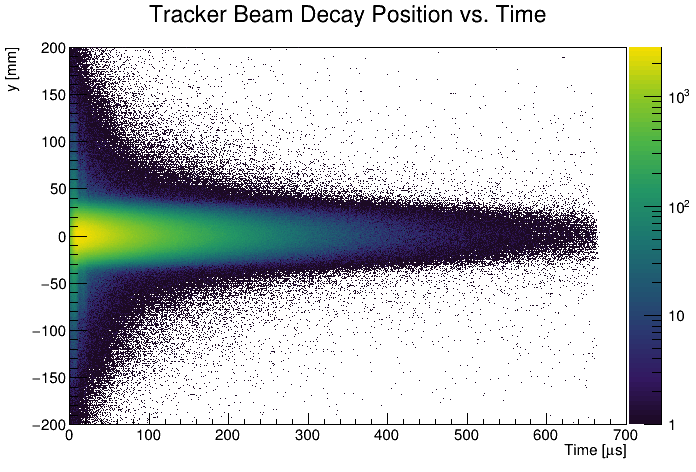

In [235]:
c = r.TCanvas()
#trackerBeamPos.Draw("lego2z")
trackerBeamPos.GetZaxis().SetRange(trackerBeamPos.GetZaxis().FindBin(station),trackerBeamPos.GetZaxis().FindBin(station))

hi = trackerBeamPos.Project3D("yx").Clone()
hi.SetTitle("Tracker Beam Decay Position vs. Time; Time [#mus]; y [mm]")
hi.Draw("colz")
c.SetLogz()
c.Draw()

---

### Lets get the beam position vs. time for the selected station

In [236]:
trackerBeamPos.GetZaxis().SetRange(trackerBeamPos.GetZaxis().FindBin(station),trackerBeamPos.GetZaxis().FindBin(station))
widthDict = getWidths(trackerBeamPos.Project3D("yx"))

In [237]:
tlow = 30
thigh = 500
func,paramVec = fitfunc(0, [tlow,thigh],[15,-170,0.00053,0.061]) 

fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'],nFit=2)
allFitResults[name+"_beam"] = fitresult

In [247]:
station = 12
calo = station +1
func_to_use = {"EndGame":0, "Run 2C":0}



#which file to pull the data from
paths = {"EndGame":"/home/jlab/g-2/caloTrackMatching/data/endgame/",
         "Run 2C" :"/home/jlab/g-2/caloTrackMatching/data/run2c/"}

allfiles = {}
for name,path in paths.items():
    print(name,path)
    files = os.listdir(path)
    #print(files)
    names = [x.split("_")[0] for x in files]
    #print(names)

    fs = {}
    for file in files:
        namei = file.split("_")[0]
        fs[namei] = r.TFile(path+file)
        #fs[namei].ls()
    allfiles[name] = fs
print(allfiles)

name = 'EndGame'
namei = 'tracks'



#which plot within the file to plot
toplot = "trackerBeamPosRand"
#toplot = "trackerCaloPosRand"

fits = {}
timerebin=10

EndGame /home/jlab/g-2/caloTrackMatching/data/endgame/
Run 2C /home/jlab/g-2/caloTrackMatching/data/run2c/
{'EndGame': {'clusters': <ROOT.TFile object ("/home/jlab/g-2/caloTrackMatching/data/endgame/clusters_eg.root") at 0x56513a13fe40>, 'tracks': <ROOT.TFile object ("/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root") at 0x56513afc4bc0>, 'matchedTracks': <ROOT.TFile object ("/home/jlab/g-2/caloTrackMatching/data/endgame/matchedTracks_eg.root") at 0x56513a680130>}, 'Run 2C': {'tracks': <ROOT.TFile object ("/home/jlab/g-2/caloTrackMatching/data/run2c/tracks_run2c.root") at 0x56513949f990>, 'clusters': <ROOT.TFile object ("/home/jlab/g-2/caloTrackMatching/data/run2c/clusters_run2c.root") at 0x56513aa6c780>, 'matchedTracks': <ROOT.TFile object ("/home/jlab/g-2/caloTrackMatching/data/run2c/matchedTracks_run2c.root") at 0x56513a0dc8d0>}}


In [248]:
tlow = 20
thigh = 300
for station in [12,18]:
    print("Starting station:",station)
    fs = allfiles[name]
    func,paramVec = fitfunc(func_to_use[name], [tlow,thigh],[15,-1,0.001,-0.001]) 
    f = fs[namei]
    f.ls()
    
    h = f.Get(toplot).Clone()
    h.Rebin3D(timerebin,1,1)
    h.GetZaxis().SetRange(h.GetZaxis().FindBin(station),h.GetZaxis().FindBin(station))
    h.GetYaxis().SetRange(h.GetYaxis().FindBin(-50),h.GetYaxis().FindBin(50))
    widthDict = getWidths(h.Project3D("yx"))
    
    fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
    fits["Width from Station "+str(station)] = fitresult

Starting station: 12
Starting station: 18
TFile**		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
  KEY: TH3I	trackerBeamPos;1	Tracker Beam Position vs. Time
  KEY: TH3I	trackerCaloPos;1	Tracker Calo Face Position vs. Time
  KEY: TH3I	trackerBeamPosRand;1	Tracker Beam Position vs. Rand Time
  KEY: TH3I	trackerCaloPosRand;1	Tracker Calo Face Position vs. Rand Time
  KEY: TH3I	trackerCaloPos_noRadialField;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time
  KEY: TH3I	trackerCaloPos_noRadialFieldRand;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time
TFile**		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
  OBJ: TH3I	trackerBeamPosRand	Tracker Beam Position vs. Rand Time : 0 at: 0x56513a98ee50
  KEY: TH3I	trackerBeamPos;1	Tracker Beam Position vs. Time
  KEY: TH3I	trackerCaloPos;1	Track

In [249]:
print(fits)

{'Width from Station 12': <python_fit.fitVector object at 0x7fd7281e6b10>, 'Width from Station 18': <python_fit.fitVector object at 0x7fd7450a7590>}


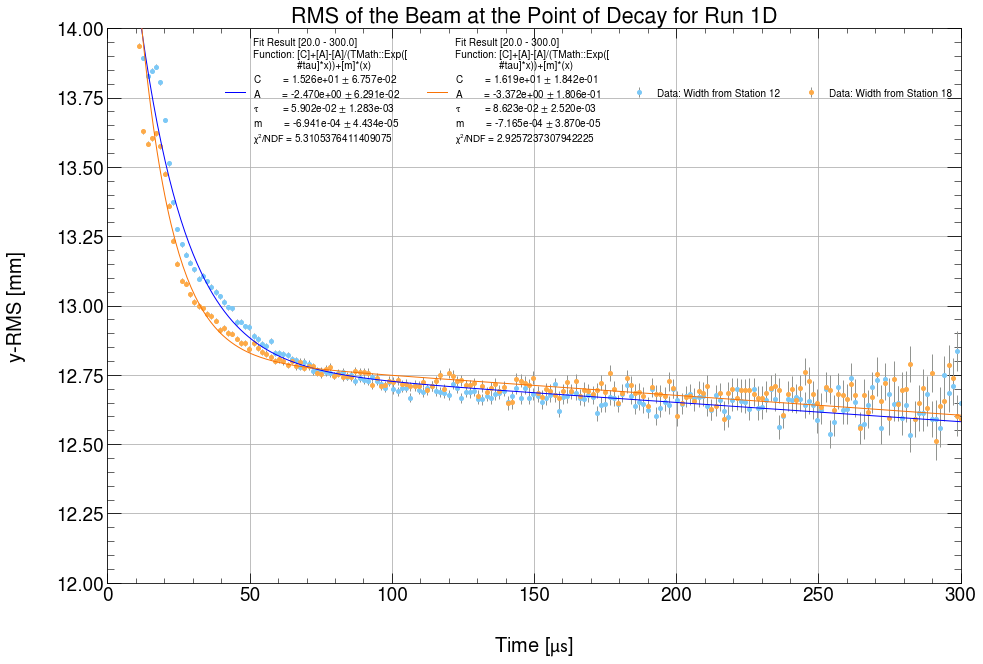

In [250]:
enable_atlas_python()
fig,ax = plt.subplots(figsize=(15,10))
fig, ax = compareFits(fits,fig,ax,fmti=".")
#plt.ylim(25,28)
plt.ylim(12,14)
plt.xlim(0,300)
plt.legend(ncol=4,fontsize=10)
plt.xlabel(r"Time [$\mu s$]")
plt.ylabel(r"y-RMS [mm]")
plt.title("RMS of the Beam at the Point of Decay for Run 1D")
#plt.title("RMS of the Beam at the Calo Face for Endgame and Run-2C [Station "+str(station)+"]")
plt.show()

In [251]:
tlow = 5
thigh = 300
for station in [12,18]:
    print("Starting station:",station)
    fs = allfiles[name]
    func,paramVec = fitfunc(func_to_use[name], [tlow,thigh],[1,1,0.01,-0.001]) 
    func.SetParLimits(1,0.0001,10000)
    func.SetParLimits(2,0.0001,10000)
    f = fs[namei]
    f.ls()
    
    h = f.Get(toplot).Clone()
    h.Rebin3D(timerebin,1,1)
    h.GetZaxis().SetRange(h.GetZaxis().FindBin(station),h.GetZaxis().FindBin(station))
    h.GetYaxis().SetRange(h.GetYaxis().FindBin(-50),h.GetYaxis().FindBin(50))
    widthDict = getWidths(h.Project3D("yx"))
    
    fitresult = fitVector(widthDict['times'], widthDict['means'], func, None, widthDict['meanErrs'])
    fits["Mean from Station "+str(station)] = fitresult

Starting station: 12
Starting station: 18
TFile**		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
  OBJ: TH3I	trackerBeamPosRand	Tracker Beam Position vs. Rand Time : 0 at: 0x56513a98ee50
  KEY: TH3I	trackerBeamPos;1	Tracker Beam Position vs. Time
  KEY: TH3I	trackerCaloPos;1	Tracker Calo Face Position vs. Time
  KEY: TH3I	trackerBeamPosRand;1	Tracker Beam Position vs. Rand Time
  KEY: TH3I	trackerCaloPosRand;1	Tracker Calo Face Position vs. Rand Time
  KEY: TH3I	trackerCaloPos_noRadialField;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time
  KEY: TH3I	trackerCaloPos_noRadialFieldRand;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time
TFile**		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
  OBJ: TH3I	trackerBeamPosRand	Tracker Beam Position vs. Rand Time : 0 at: 0x56513a98ee50
  KE

In [252]:
print(fits)

{'Width from Station 12': <python_fit.fitVector object at 0x7fd7281e6b10>, 'Width from Station 18': <python_fit.fitVector object at 0x7fd7450a7590>, 'Mean from Station 12': <python_fit.fitVector object at 0x7fd743ff7710>, 'Mean from Station 18': <python_fit.fitVector object at 0x7fd746a44590>}


---

### Now lets combine them all together into one plot

In [253]:
print(fits)

{'Width from Station 12': <python_fit.fitVector object at 0x7fd7281e6b10>, 'Width from Station 18': <python_fit.fitVector object at 0x7fd7450a7590>, 'Mean from Station 12': <python_fit.fitVector object at 0x7fd743ff7710>, 'Mean from Station 18': <python_fit.fitVector object at 0x7fd746a44590>}


'FreeSans.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


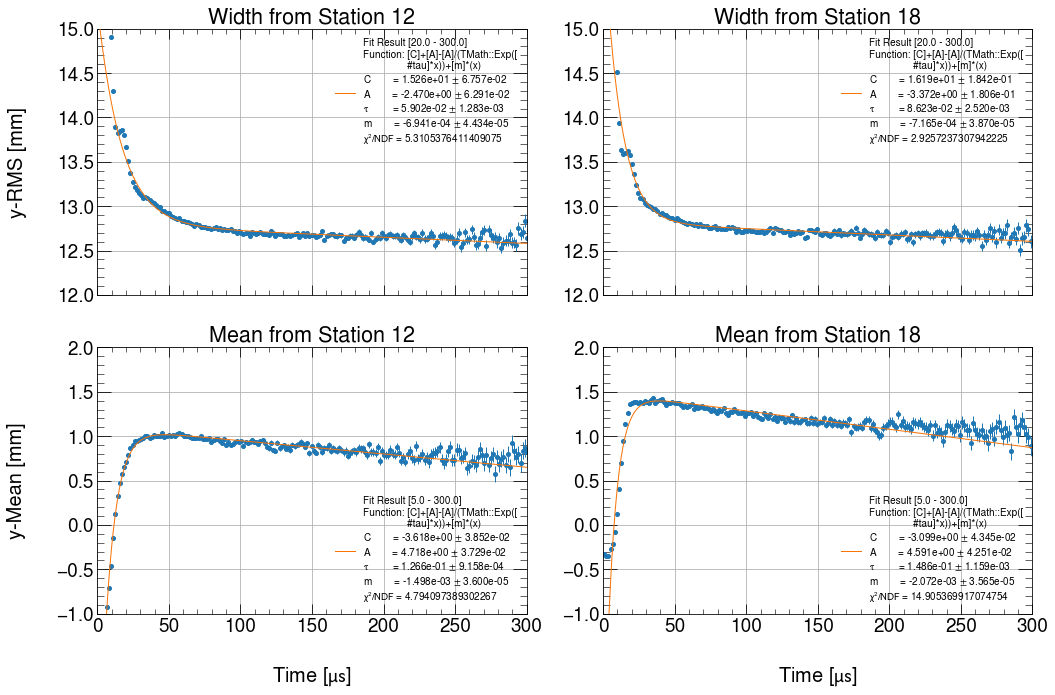

In [255]:
fig,axs = plt.subplots(2,2,figsize=(15,10),sharex=True, sharey=False)
ax = flatten2dArray(axs)

for i, fitname in enumerate(fits):
    axi = ax[i]
    plt.sca(axi)
    fit = fits[fitname]
    print(fit)
    
    plt.errorbar(fit.x, fit.y, yerr=fit.yerr, fmt=".")
    fit.drawFitResult(axi,1000)
    if(i < 2):
        axi.set_ylim(12,15)
    else:
        axi.set_ylim(-1,2)
        axi.set_xlabel(r"Time [$\mu s$]")
    if(i is 0):
        axi.set_ylabel("y-RMS [mm]")
    elif(i is 2):
        axi.set_ylabel("y-Mean [mm]")
    axi.set_title(fitname)
    axi.grid()

    plt.xlim(0,300)
    axi.legend(fontsize=10)
plt.tight_layout()
#plt.suptitle("Run 1D", y=1.03, fontsize=36)
plt.savefig("./run1d_tracker_mean_rms_fits.pdf", bbox_inches="tight")
plt.show()